In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import plotly.graph_objects as gp
import matplotlib.pyplot as plt
#from sci378 import *

In [2]:
dfArms = pd.read_csv("ArmsImports.csv")
dfArms.tail()

,Year,Afghanistan,African Union**,Albania,Algeria,Amal (Lebanon)*,ANC (South Africa)*,Angola,Anti-Castro rebels (Cuba)*,Argentina,...,Viet Minh (France)*,Viet Nam,Western Sahara,Yemen,Yemen Arab Republic,Yugoslavia,Zambia,ZAPU (Zimbabwe)*,Zimbabwe,Total
67,2017,252.0,NaN,2.0,1139.0,NaN,NaN,110.0,NaN,45.0,...,NaN,783.0,NaN,6.0,NaN,NaN,46.0,NaN,NaN,31878
68,2018,322.0,0.0,3.0,1291.0,NaN,NaN,272.0,NaN,18.0,...,NaN,604.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,27327
69,2019,396.0,2.0,5.0,164.0,NaN,NaN,169.0,NaN,50.0,...,NaN,160.0,NaN,NaN,NaN,NaN,43.0,NaN,NaN,27502
70,2020,240.0,NaN,1.0,661.0,NaN,NaN,51.0,NaN,7.0,...,NaN,32.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,23677
71,2021,16403.0,78.0,2771.0,32383.0,60.0,0.0,8544.0,2.0,12171.0,...,3.0,26944.0,77.0,2443.0,63.0,17476.0,1256.0,1.0,946.0,1976320


In [3]:
dfDebt = pd.read_csv("US Debt Tracker Dataset (Ver 2.17.23).csv")
dfDebt

,Record_Date,Debt_Held_by_the_Public,Intragovernmental_Holdings,Total_Public_Debt_Outstanding
0,2/15/2023,2.460000e+13,6.820000e+12,3.150000e+13
1,2/14/2023,2.460000e+13,6.830000e+12,3.150000e+13
2,2/13/2023,2.460000e+13,6.830000e+12,3.150000e+13
3,2/10/2023,2.460000e+13,6.820000e+12,3.150000e+13
4,2/9/2023,2.460000e+13,6.820000e+12,3.150000e+13
...,...,...,...,...
7490,4/7/1993,NaN,NaN,4.250000e+12
7491,4/6/1993,NaN,NaN,4.240000e+12
7492,4/5/1993,NaN,NaN,4.230000e+12
7493,4/2/1993,NaN,NaN,4.230000e+12


In [4]:
dfDebt['Record_Date'] = pd.to_datetime(dfDebt['Record_Date'])

dfDebt['Year_Month'] = dfDebt['Record_Date'].dt.to_period('M')

df_monthly_avg = dfDebt.groupby('Year_Month').mean().reset_index()

df_monthly_avg.head()

,Year_Month,Debt_Held_by_the_Public,Intragovernmental_Holdings,Total_Public_Debt_Outstanding
0,1993-04,NaN,NaN,4.240455e+12
1,1993-05,NaN,NaN,4.266500e+12
2,1993-06,NaN,NaN,4.303182e+12
3,1993-07,NaN,NaN,4.340476e+12
4,1993-08,NaN,NaN,4.371364e+12


In [5]:
dfDebt['Record_Date'] = pd.to_datetime(dfDebt['Record_Date'])

dfDebt['Year'] = dfDebt['Record_Date'].dt.year
dfDebtYearly = dfDebt.groupby('Year').mean().reset_index()

print(dfDebtYearly)


    Year  Debt_Held_by_the_Public  Intragovernmental_Holdings  \
0   1993                      NaN                         NaN   
1   1994                      NaN                         NaN   
2   1995                      NaN                         NaN   
3   1996                      NaN                         NaN   
4   1997             3.790000e+12                1.620000e+12   
5   1998             3.730000e+12                1.790000e+12   
6   1999             3.640000e+12                2.020000e+12   
7   2000             3.410000e+12                2.270000e+12   
8   2001             3.365000e+12                2.495000e+12   
9   2002             3.504167e+12                2.637500e+12   
10  2003             3.865455e+12                2.833636e+12   
11  2004             4.247500e+12                3.040833e+12   
12  2005             4.609529e+12                3.296754e+12   
13  2006             4.834422e+12                3.581594e+12   
14  2007             5.02

In [6]:
merged_df = pd.merge(dfDebtYearly, dfArms, how='left', on=['Year', 'Year'])

merged_df.head()

,Year,Debt_Held_by_the_Public,Intragovernmental_Holdings,Total_Public_Debt_Outstanding,Afghanistan,African Union**,Albania,Algeria,Amal (Lebanon)*,ANC (South Africa)*,...,Viet Minh (France)*,Viet Nam,Western Sahara,Yemen,Yemen Arab Republic,Yugoslavia,Zambia,ZAPU (Zimbabwe)*,Zimbabwe,Total
0,1993,NaN,NaN,4.361990e+12,NaN,NaN,NaN,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25854.0
1,1994,NaN,NaN,4.627610e+12,NaN,NaN,NaN,182.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,22964.0
2,1995,NaN,NaN,4.909080e+12,NaN,NaN,26.0,296.0,NaN,NaN,...,NaN,281.0,NaN,171.0,NaN,NaN,NaN,NaN,NaN,22916.0
3,1996,NaN,NaN,5.144841e+12,NaN,NaN,NaN,83.0,NaN,NaN,...,NaN,212.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,23858.0
4,1997,3.790000e+12,1.620000e+12,5.377177e+12,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28961.0


In [7]:
dfBudget = pd.read_csv("budget.csv")
dfBudget.head()

,Year,Corps of Engineers,Department of Agriculture,Department of Commerce,Department of Defense,Department of Education,Department of Energy,Department of Health and Human Services,Department of Homeland Security,Department of Housing and Urban Development,...,National Aeronautics and Space Administration,National Science Foundation,Office of Personnel Management,Other Defense Civil Programs,Other Independent Agencies (Off-Budget),Other Independent Agencies (On-Budget),Small Business Administration,Social Security Administration (Off-Budget),Social Security Administration (On-Budget),Undistributed Offsetting Receipts
0,1976,2177,20690,1732,95503,9314,4970,40368,2423,29200,...,3552,717,8870,7390,NaN,17692,621,74019,6044,-22186
1,1977,2479,21841,7814,107906,10568,7021,47035,2881,33818,...,3876,783,10255,8273,NaN,8692,1068,84909,6612,-23018
2,1978,2781,26659,1892,114531,11625,10467,51891,3314,37994,...,4244,868,11631,9213,NaN,8981,3555,93712,5991,-24250
3,1979,2780,37250,2086,123595,13996,9805,59726,3969,31142,...,4743,914,13314,10319,NaN,10957,2081,104233,6266,-27428
4,1980,3247,39559,2610,140651,15209,10767,70002,4424,35852,...,5350,991,15711,12020,NaN,28922,2145,119278,7144,-31988


In [8]:
merged_df2 = pd.merge(merged_df, dfBudget, how='left', on=['Year', 'Year'])

merged_df2.shape

(31, 297)

In [9]:
dfUnEmp = pd.read_csv("Unemployment.csv")
dfUnEmp.head()

,FIPS Code,StateArea,Year,Month,Total_Civilian_NonInstitutional_Population,Total_Civilian_Labor_Force,Percent_(%)_of_Population,Total_Employment,Percent_(%)_of _Labor_Force_Employed,Total_Unemployment,Percent_(%)_of _Labor_Force_Unemployed
0,1,Alabama,1976,1,2605000.0,1484555.0,57.0,1386023.0,53.2,98532.0,6.6
1,2,Alaska,1976,1,232000.0,160183.0,69.0,148820.0,64.1,11363.0,7.1
2,4,Arizona,1976,1,1621000.0,964120.0,59.5,865871.0,53.4,98249.0,10.2
3,5,Arkansas,1976,1,1536000.0,889044.0,57.9,824395.0,53.7,64649.0,7.3
4,6,California,1976,1,15621000.0,9774280.0,62.6,8875685.0,56.8,898595.0,9.2


In [10]:
print(dfUnEmp.columns)


Index(['FIPS Code', 'StateArea', 'Year', 'Month',
       'Total_Civilian_NonInstitutional_Population',
       'Total_Civilian_Labor_Force', 'Percent_(%)_of_Population',
       'Total_Employment', 'Percent_(%)_of _Labor_Force_Employed',
       'Total_Unemployment', 'Percent_(%)_of _Labor_Force_Unemployed'],
      dtype='object')


In [11]:
dfUnEmp2 = dfUnEmp.drop(columns=['FIPS Code', 'StateArea', 'Percent_(%)_of_Population'])

dfUnEmp2['Year'] = dfUnEmp2['Year'].astype(str)
dfUnEmp2['Month'] = dfUnEmp2['Month'].astype(str).str.zfill(2)
dfUnEmp2['YearMonth'] = pd.to_datetime(dfUnEmp2['Year'] + '-' + dfUnEmp2['Month'])

dfUnEmpMonth = dfUnEmp2.groupby('YearMonth').sum().reset_index()

dfUnEmpMonth['Percent_(%)_of _Labor_Force_Employed'] = (dfUnEmpMonth['Total_Employment'] / dfUnEmpMonth['Total_Civilian_Labor_Force']) * 100
dfUnEmpMonth['Percent_(%)_of _Labor_Force_Unemployed'] = (dfUnEmpMonth['Total_Employment'] / dfUnEmpMonth['Total_Civilian_Labor_Force']) * 100

dfUnEmpMonth.head()

,YearMonth,Total_Civilian_NonInstitutional_Population,Total_Civilian_Labor_Force,Total_Employment,Percent_(%)_of _Labor_Force_Employed,Total_Unemployment,Percent_(%)_of _Labor_Force_Unemployed
0,1976-01-01,165430000.0,101836208.0,93748772.0,92.058389,8087436.0,92.058389
1,1976-02-01,165694000.0,101798481.0,93714001.0,92.058349,8084480.0,92.058349
2,1976-03-01,165945000.0,101808529.0,93748383.0,92.083035,8060146.0,92.083035
3,1976-04-01,166200000.0,101966712.0,93963034.0,92.150695,8003678.0,92.150695
4,1976-05-01,166461000.0,102203702.0,94252804.0,92.220538,7950898.0,92.220538


In [12]:
#dfUnEmpYear = dfUnEmp2.groupby('Year').sum().reset_index()

#dfUnEmpYear['Percent_(%)_of _Labor_Force_Employed'] = (dfUnEmpYear['Total_Employment'] / dfUnEmpYear['Total_Civilian_Labor_Force']) * 100
#dfUnEmpYear['Percent_(%)_of _Labor_Force_Unemployed'] = (dfUnEmpYear['Total_Employment'] / dfUnEmpYear['Total_Civilian_Labor_Force']) * 100

#dfUnEmpYear.head()

In [13]:
#merged_df2['Year'] = merged_df2['Year'].astype(int)
#dfUnEmpYear['Year'] = dfUnEmpYear['Year'].astype(int)

#merged_df3 = pd.merge(merged_df2, dfUnEmpYear, how='left', on='Year')

#merged_df3.tail(30)

In [14]:
dfGTD = pd.read_csv("Terror2020.csv")
dfGTD.head(2)

C:\Users\student\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [15]:
dfGTD.shape

(209706, 135)

In [16]:
dfGTD3 = pd.read_csv("Terror21.csv")
dfGTD3.head(2)

C:\Users\student\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (79,114,115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaN,60,Egypt,10,...,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaN,92,India,6,...,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [17]:
dfGTD3.shape

(4960, 135)

In [18]:
dfGTD1 = pd.concat([dfGTD, dfGTD3], ignore_index=True)
dfGTD1.shape

(214666, 135)

In [40]:
dfGTD1=dfGTD

In [41]:
print(dfGTD1.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [42]:
dfGTD2 = dfGTD1.drop(columns=['resolution','approxdate','attacktype2_txt','attacktype3','attacktype3_txt','targtype2','targtype2_txt','targsubtype2','targsubtype2_txt'
,'corp2','target2','natlty2','natlty2_txt','targtype3','targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3'
,'natlty3','natlty3_txt','gname2','gsubname2','gname3','gsubname3','guncertain2','guncertain3'
,'claimmode','claimmode_txt','claim2','claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt','weaptype2'
,'weaptype2_txt','weaptype3','weaptype3_txt','weaptype4','weaptype4_txt','weapsubtype4'
,'weapsubtype4_txt','nhostkid','nhostkidus','ndays','divert','kidhijcountry'
,'ransomamtus','ransompaidus','related'])
dfGTD2.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,National,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [43]:
dfGTD2.shape

(209706, 84)

In [44]:
dfUS = dfGTD2[dfGTD2['country_txt'] == 'United States']
dfUS.shape

(3121, 84)

In [45]:
import pandas as pd

# Assuming dfUS is already defined and contains the relevant data
# dfUS = pd.read_csv("path_to_your_us_data.csv")

# Add the 'North' column based on the 'Latitude' column
dfUS['North'] = dfUS['latitude'].apply(lambda x: 1 if x >= 38.9072 else 0)

# Display the first few rows of the dataframe to confirm the changes
print(dfUS.head())

         eventid  iyear  imonth  iday  extended  country    country_txt  \
5   197001010002   1970       1     1         0      217  United States   
7   197001020002   1970       1     2         0      217  United States   
8   197001020003   1970       1     2         0      217  United States   
9   197001030001   1970       1     3         0      217  United States   
10  197001050001   1970       1     1         0      217  United States   

    region     region_txt   provstate  ...  \
5        1  North America    Illinois  ...   
7        1  North America  California  ...   
8        1  North America   Wisconsin  ...   
9        1  North America   Wisconsin  ...   
10       1  North America   Wisconsin  ...   

                                             addnotes  \
5   The Cairo Chief of Police, William Petersen, r...   
7   Damages were estimated to be between $20,000-$...   
8   The New Years Gang issue a communiqué to a loc...   
9   Karl Armstrong's girlfriend, Lynn Schult

C:\Users\student\AppData\Local\Temp/ipykernel_12688/212925860.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
import pandas as pd
import numpy as np

# Step 1: Create the 'casualties' column
dfUS['casualties'] = dfUS['nkill'].fillna(0) + dfUS['nwound'].fillna(0)

# Step 2: Define bin edges and labels
bin_edges = np.arange(0, dfUS['casualties'].max() + 10, 5)
bin_labels = [f"{int(edge)}-{int(edge+5)}" for edge in bin_edges[:-1]]

# Step 3: Digitize the casualties into bins
dfUS['casualty_bin'] = pd.cut(dfUS['casualties'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Step 4: Count instances per bin for North and South
north_counts = dfUS[dfUS['North'] == 1]['casualty_bin'].value_counts().sort_index()
south_counts = dfUS[dfUS['North'] == 0]['casualty_bin'].value_counts().sort_index()

# Ensure both counts have the same index for combining into dfPyramid
all_bins = north_counts.index.union(south_counts.index).sort_values()
north_counts = north_counts.reindex(all_bins, fill_value=0)
south_counts = south_counts.reindex(all_bins, fill_value=0)

# Step 5: Create the dfPyramid DataFrame
dfPyramid = pd.DataFrame({
    'casualties': all_bins,
    'north': north_counts.values,
    'south': south_counts.values
})

# Display the resulting DataFrame
print(dfPyramid)

       casualties  north  south
0             0-5   1556   1475
1            5-10     16     19
2           10-15      7      7
3           15-20      5      3
4           20-25      3      2
...           ...    ...    ...
2449  12245-12250      0      0
2450  12250-12255      0      0
2451  12255-12260      0      0
2452  12260-12265      2      0
2453  12265-12270      0      0

[2454 rows x 3 columns]


C:\Users\student\AppData\Local\Temp/ipykernel_12688/4169448280.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\student\AppData\Local\Temp/ipykernel_12688/4169448280.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# Step 6: Drop the first bin (0-5)
dfPyramid = dfPyramid[dfPyramid['casualties'] != '0-5']

# Step 7: Drop bins with 0s in both north and south
dfPyramid = dfPyramid[~((dfPyramid['north'] == 0) & (dfPyramid['south'] == 0))]

# Display the filtered DataFrame
print(dfPyramid)


       casualties  north  south
1            5-10     16     19
2           10-15      7      7
3           15-20      5      3
4           20-25      3      2
5           25-30      1      3
6           30-35      1      2
7           35-40      2      1
8           40-45      0      1
9           45-50      0      1
10          50-55      1      1
11          55-60      1      0
15          75-80      0      2
16          80-85      1      0
20        100-105      0      1
26        130-135      2      0
33        165-170      0      1
59        295-300      0      1
150       750-755      1      0
163       815-820      0      1
181       905-910      0      1
2452  12260-12265      2      0


In [48]:
import plotly.graph_objects as gp
y_cas = dfPyramid['casualties'] 
x_N = dfPyramid['north'] 
x_S = dfPyramid['south'] * -1

# Creating instance of the figure 
fig = gp.Figure() 

# Adding Male data to the figure 
fig.add_trace(gp.Bar(y= y_cas, x = x_N, name = 'North', orientation = 'h')) 

# Adding Female data to the figure 
fig.add_trace(gp.Bar(y = y_cas, x = x_S, name = 'South', orientation = 'h')) 

# Updating the layout for our graph 
fig.update_layout(title = 'Count of Casualties', title_font_size = 22, barmode = 'relative', bargap = 0.0 ) 

fig.show()


In [49]:
dfUS_cleaned = dfUS.dropna(subset=["longitude", "latitude"])

m = folium.Map(location=[37.6872, -97.3301], zoom_start=4)

for i in range(len(dfUS_cleaned)):
    folium.Marker(
        location=[dfUS_cleaned.iloc[i]['latitude'], dfUS_cleaned.iloc[i]['longitude']],
        icon=folium.Icon(color="blue")
    ).add_to(m)

#display(m)

In [56]:
dfUS_cleaned = dfUS.dropna(subset=["longitude", "latitude"])

color_mapping = {
    6: 'green',
    8: 'red',
    5: 'black'
}

default_color = 'blue'

m = folium.Map(location=[37.6872, -97.3301], zoom_start=3.4)

for i in range(len(dfUS_cleaned)):
    lat = dfUS_cleaned.iloc[i]['latitude']
    lon = dfUS_cleaned.iloc[i]['longitude']
    weaptype1 = dfUS_cleaned.iloc[i]['weaptype1']
    year = dfUS_cleaned.iloc[i]['iyear']
    attacktype = dfUS_cleaned.iloc[i]['attacktype1_txt']
    
    color = color_mapping.get(weaptype1, default_color)
    
    popup_info = f"Year: {year}<br>Attack Type: {attacktype}"
    
    folium.Marker(
        location=[lat, lon],
        popup=popup_info,
        icon=folium.Icon(color=color)
    ).add_to(m)

#display(m)

In [51]:
df_filtered = dfUS[(dfUS['iyear'] >= 2017) & (dfUS['iyear'] != 2021)]
df_filtered['casualties'] = dfUS['nkill'].fillna(0) + dfUS['nwound'].fillna(0)
df_filtered = df_filtered.dropna(subset=["casualties"])
df_filtered = df_filtered[(df_filtered['iyear'] != 2000) & (df_filtered['imonth'] != 9) & (df_filtered['iday'] != 11)]
df_filtered =df_filtered[df_filtered['eventid'] != 201710010018]


# Step 2: Group by 'provstate' and sum the 'casualities'
provstate_casualities = df_filtered.groupby('provstate')['casualties'].sum().reset_index()

# Step 3: Sort by 'casualities' to get the top 8 'provstate's
top_provstates = provstate_casualities.sort_values(by='casualties', ascending=False).head(4)

# Step 4: Filter the original df_filtered to include only the top 8 'provstate's
df_top_provstates = df_filtered[df_filtered['provstate'].isin(top_provstates['provstate'])]


C:\Users\student\AppData\Local\Temp/ipykernel_12688/763070726.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



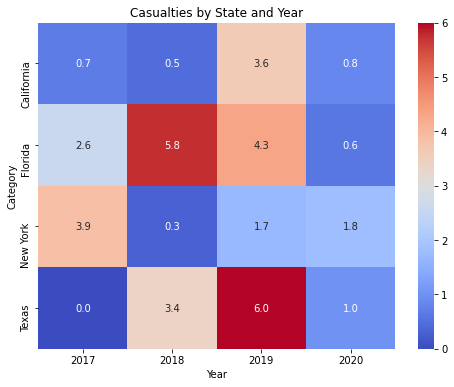

In [52]:
# Creating a heatmap using Seaborn
plt.figure(figsize=(8, 6))
heatmap_data = df_top_provstates.pivot_table(index='provstate', columns='iyear', values='casualties', aggfunc='mean')
#display(heatmap_data)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Casualties by State and Year')
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()

In [53]:
valid_dates = (dfUS['iyear'] > 0) & (dfUS['imonth'].between(1, 12)) & (dfUS['iday'].between(1, 31)) 
dfGTD2_valid = dfUS[valid_dates]

dfGTD2_valid['date'] = pd.to_datetime(dfGTD2_valid[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1), errors='coerce').dt.strftime('%-m/%-d/%Y')

dfGTD2_valid = dfGTD2_valid.dropna(subset=['date'])
dfGTD2_valid.head()

C:\Users\student\AppData\Local\Temp/ipykernel_12688/827283536.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,North,casualties,casualty_bin,date
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,"Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,0,0.0,0-5,1970-01-01 00:00:00
7,197001020002,1970,1,2,0,217,United States,1,North America,California,...,NaN,Hewitt Project,-9,-9,0,-9,0,0.0,0-5,1970-01-02 00:00:00
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,"The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,1,0.0,0-5,1970-01-02 00:00:00
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,...,"David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,1,0.0,0-5,1970-01-03 00:00:00
10,197001050001,1970,1,1,0,217,United States,1,North America,Wisconsin,...,NaN,PGIS,0,0,0,0,1,0.0,0-5,1970-01-01 00:00:00


In [54]:
dfDebt = dfDebt.rename(columns={'Record_Date': 'date'})
dfGTD2_valid['date'] = pd.to_datetime(dfGTD2_valid['date'])
dfGTD2_valid['date'] = pd.to_datetime(dfGTD2_valid['date'])

dfUSDEBT = pd.merge(dfGTD2_valid, dfDebt, on='date', how='left')

dfUSDEBT.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,INT_ANY,North,casualties,casualty_bin,date,Debt_Held_by_the_Public,Intragovernmental_Holdings,Total_Public_Debt_Outstanding,Year_Month,Year
3083,202012130030,2020,12,13,0,217,United States,1,North America,Massachusetts,...,-9,1,0.0,0-5,2020-12-13,NaN,NaN,NaN,NaT,NaN
3084,202012130044,2020,12,13,0,217,United States,1,North America,New York,...,-9,1,1.0,0-5,2020-12-13,NaN,NaN,NaN,NaT,NaN
3085,202012150028,2020,12,15,0,217,United States,1,North America,Massachusetts,...,-9,1,0.0,0-5,2020-12-15,2.140000e+13,6.060000e+12,2.750000e+13,2020-12,2020.0
3086,202012250003,2020,12,25,0,217,United States,1,North America,Tennessee,...,-9,0,4.0,0-5,2020-12-25,NaN,NaN,NaN,NaT,NaN
3087,202012280022,2020,12,28,0,217,United States,1,North America,Massachusetts,...,-9,1,0.0,0-5,2020-12-28,2.150000e+13,6.070000e+12,2.750000e+13,2020-12,2020.0


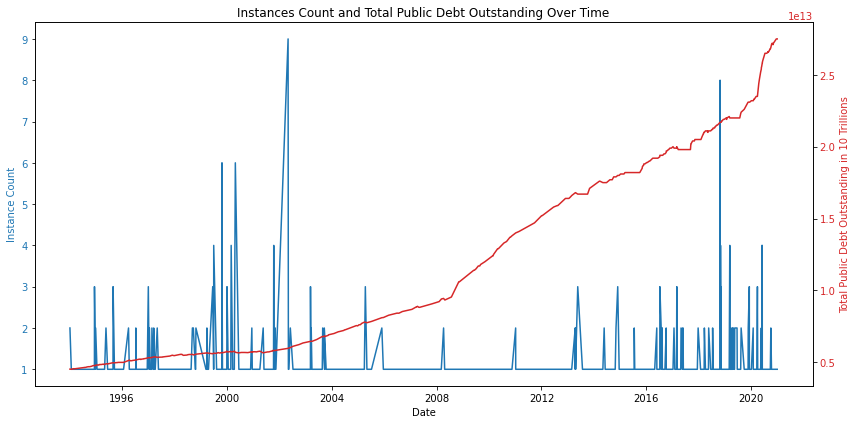

In [55]:
dfFiltered = dfUSDEBT.dropna(subset=['Total_Public_Debt_Outstanding'])
dfCount = dfFiltered.groupby('date').size().reset_index(name='instance_count')
dfFiltered = dfFiltered.merge(dfCount, on='date')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(dfFiltered['date'], dfFiltered['instance_count'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Instance Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(dfFiltered['date'], dfFiltered['Total_Public_Debt_Outstanding'], color='tab:red')
ax2.set_ylabel('Total Public Debt Outstanding in 10 Trillions', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Instances Count and Total Public Debt Outstanding Over Time')
fig.tight_layout()

plt.show()

In [35]:
state_to_region = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 
    'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest', 
    'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',
    'Alabama': 'South', 'Arkansas': 'South', 'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 
    'Kentucky': 'South', 'Louisiana': 'South', 'Maryland': 'South', 'Mississippi': 'South', 
    'North Carolina': 'South', 'Oklahoma': 'South', 'South Carolina': 'South', 'Tennessee': 'South', 
    'Texas': 'South', 'Virginia': 'South', 'West Virginia': 'South',
    'Alaska': 'West', 'Arizona': 'West', 'California': 'West', 'Colorado': 'West', 'Hawaii': 'West', 
    'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 
    'Oregon': 'West', 'Utah': 'West', 'Washington': 'West', 'Wyoming': 'West',
    'District of Columbia': 'Other', 'Puerto Rico': 'Other', 'Guam': 'Other', 
    'Virgin Islands': 'Other', 'American Samoa': 'Other', 'Northern Mariana Islands': 'Other'
}

def get_region(state):
    return state_to_region.get(state, 'Other')

dfUS['USregion'] = dfUS['provstate'].apply(get_region)

dfUS[['provstate', 'USregion']].head()


C:\Users\student\AppData\Local\Temp/ipykernel_12688/1934185501.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,provstate,USregion
5,Illinois,Midwest
7,California,West
8,Wisconsin,Midwest
9,Wisconsin,Midwest
10,Wisconsin,Midwest


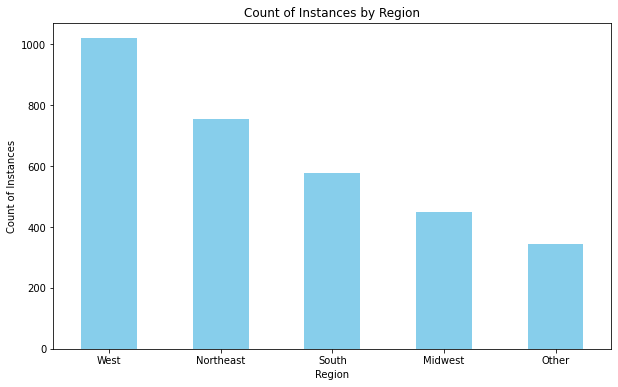

In [36]:
import matplotlib.pyplot as plt

# Count the instances by region
region_counts = dfUS['USregion'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Instances by Region')
plt.xlabel('Region')
plt.ylabel('Count of Instances')
plt.xticks(rotation=0)
plt.show()


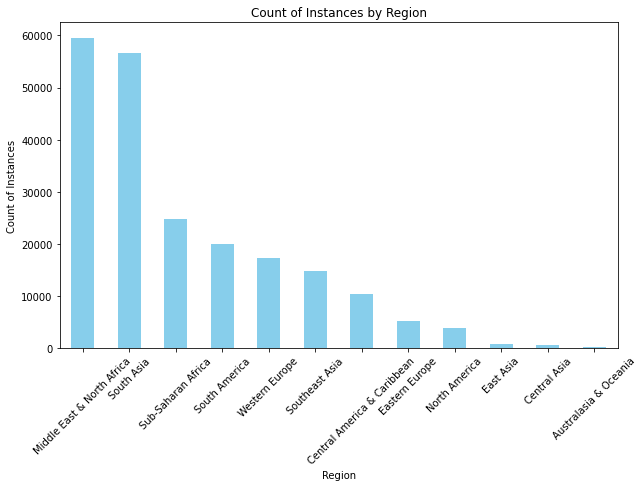

In [37]:
region_counts = dfGTD2['region_txt'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Instances by Region')
plt.xlabel('Region')
plt.ylabel('Count of Instances')
plt.xticks(rotation=45)
plt.show()

In [38]:
region_country_counts = dfGTD2.groupby(['region_txt', 'country_txt']).size().reset_index(name='count')

top_regions = region_country_counts.groupby('region_txt')['count'].sum().nlargest(5).index

top_region_data = region_country_counts[region_country_counts['region_txt'].isin(top_regions)]

top_region_data['country_rank'] = top_region_data.groupby('region_txt')['count'].rank(method='first', ascending=False)

top_countries_data = top_region_data[top_region_data['country_rank'] <= 4]
other_countries_data = top_region_data[top_region_data['country_rank'] > 4].groupby('region_txt')['count'].sum().reset_index()
other_countries_data['country_txt'] = 'Other'

combined_data = pd.concat([top_countries_data, other_countries_data], ignore_index=True)

C:\Users\student\AppData\Local\Temp/ipykernel_12688/2917428158.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



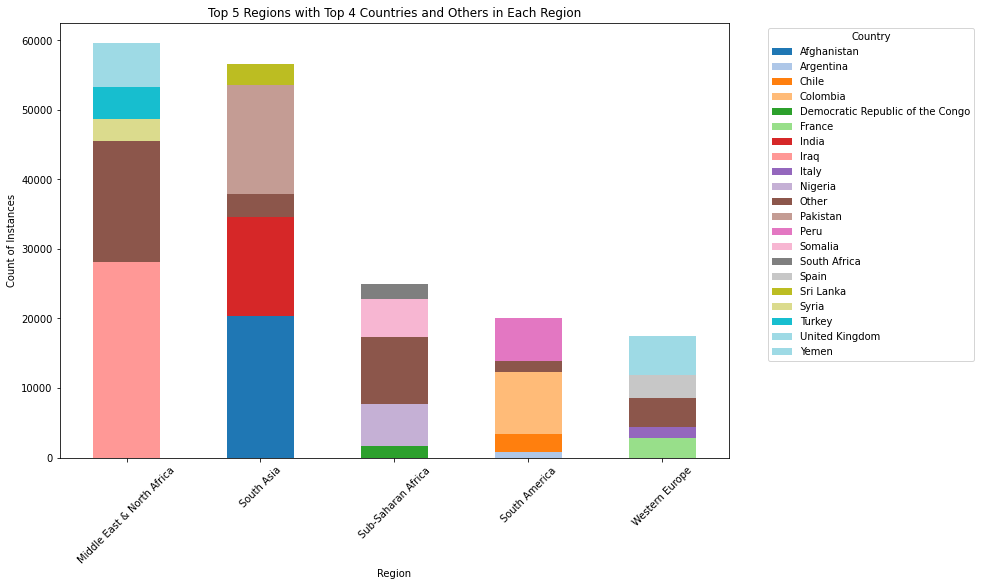

In [39]:
pivot_data = combined_data.pivot_table(index='region_txt', columns='country_txt', values='count', fill_value=0)

ordered_regions = pivot_data.sum(axis=1).sort_values(ascending=False).index
pivot_data = pivot_data.loc[ordered_regions]

for region in pivot_data.index:
    pivot_data.loc[region] = pivot_data.loc[region].sort_values(ascending=False)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Top 5 Regions with Top 4 Countries and Others in Each Region')
plt.xlabel('Region')
plt.ylabel('Count of Instances')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
